<a href="https://colab.research.google.com/github/JigneshJK/JKLinkedinAnalytics/blob/main/JK_Linkedin_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

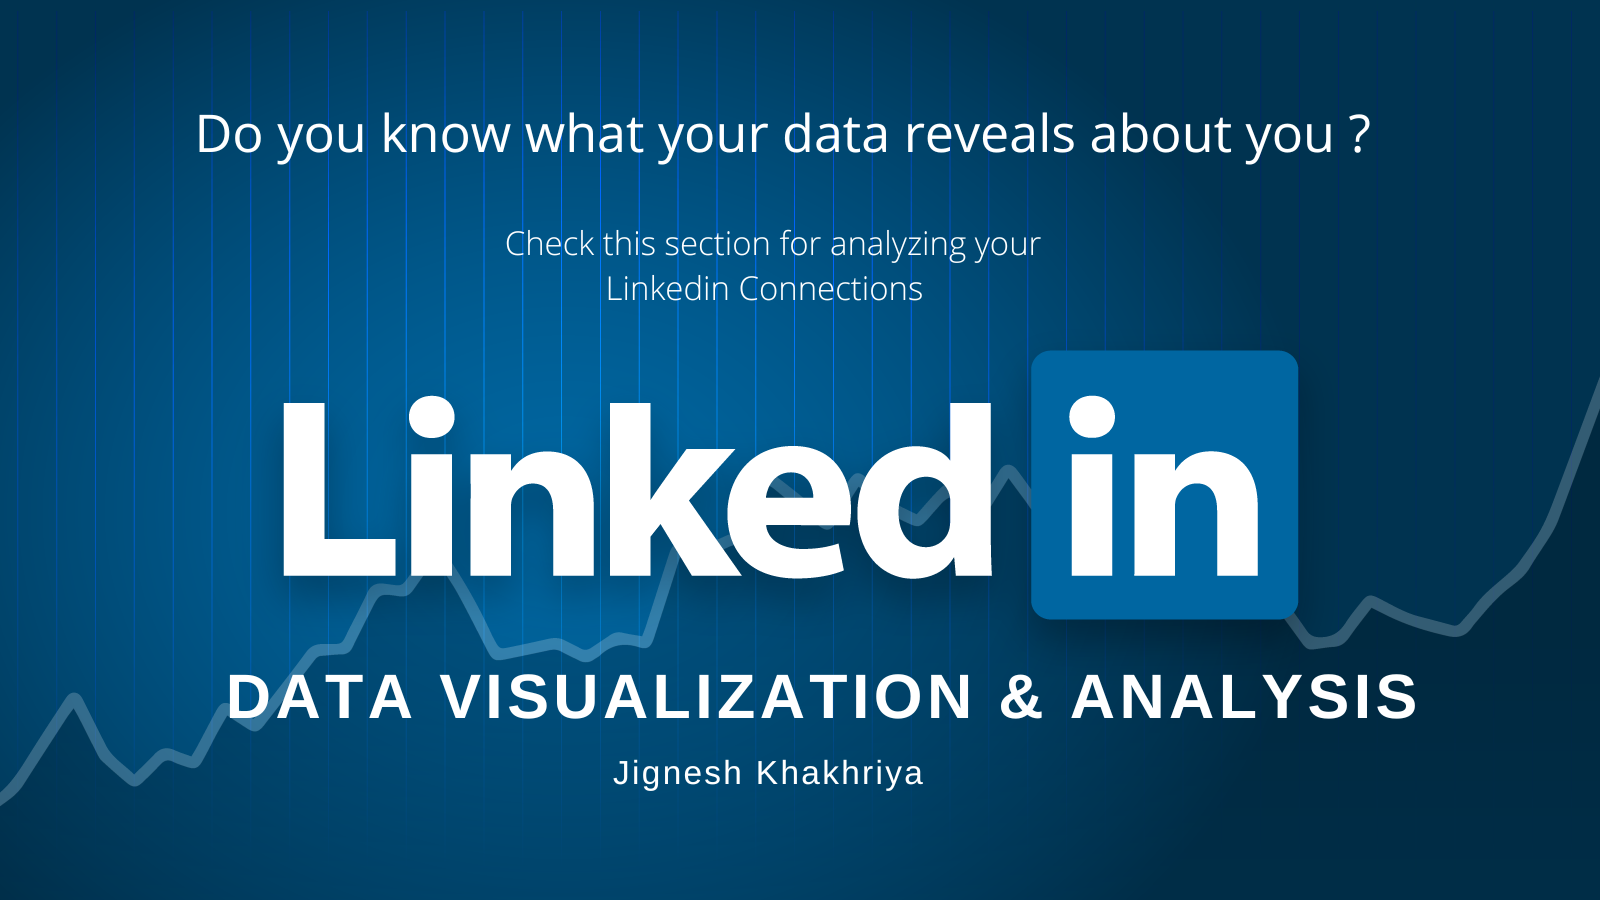

<br>

#**Welcome to your personal Linkedin Data Analyzer**


In this tutorial, we will be analyzing our connections data & will visualize them using various graphs.

<br>
________________________________________________________________________________________________________________________________________________________________

# **A) Download Your Linked in Data**

Please follow below steps to get dump of your linkedin data.

Refere https://www.linkedin.com/help/linkedin/answer/50191 for more details

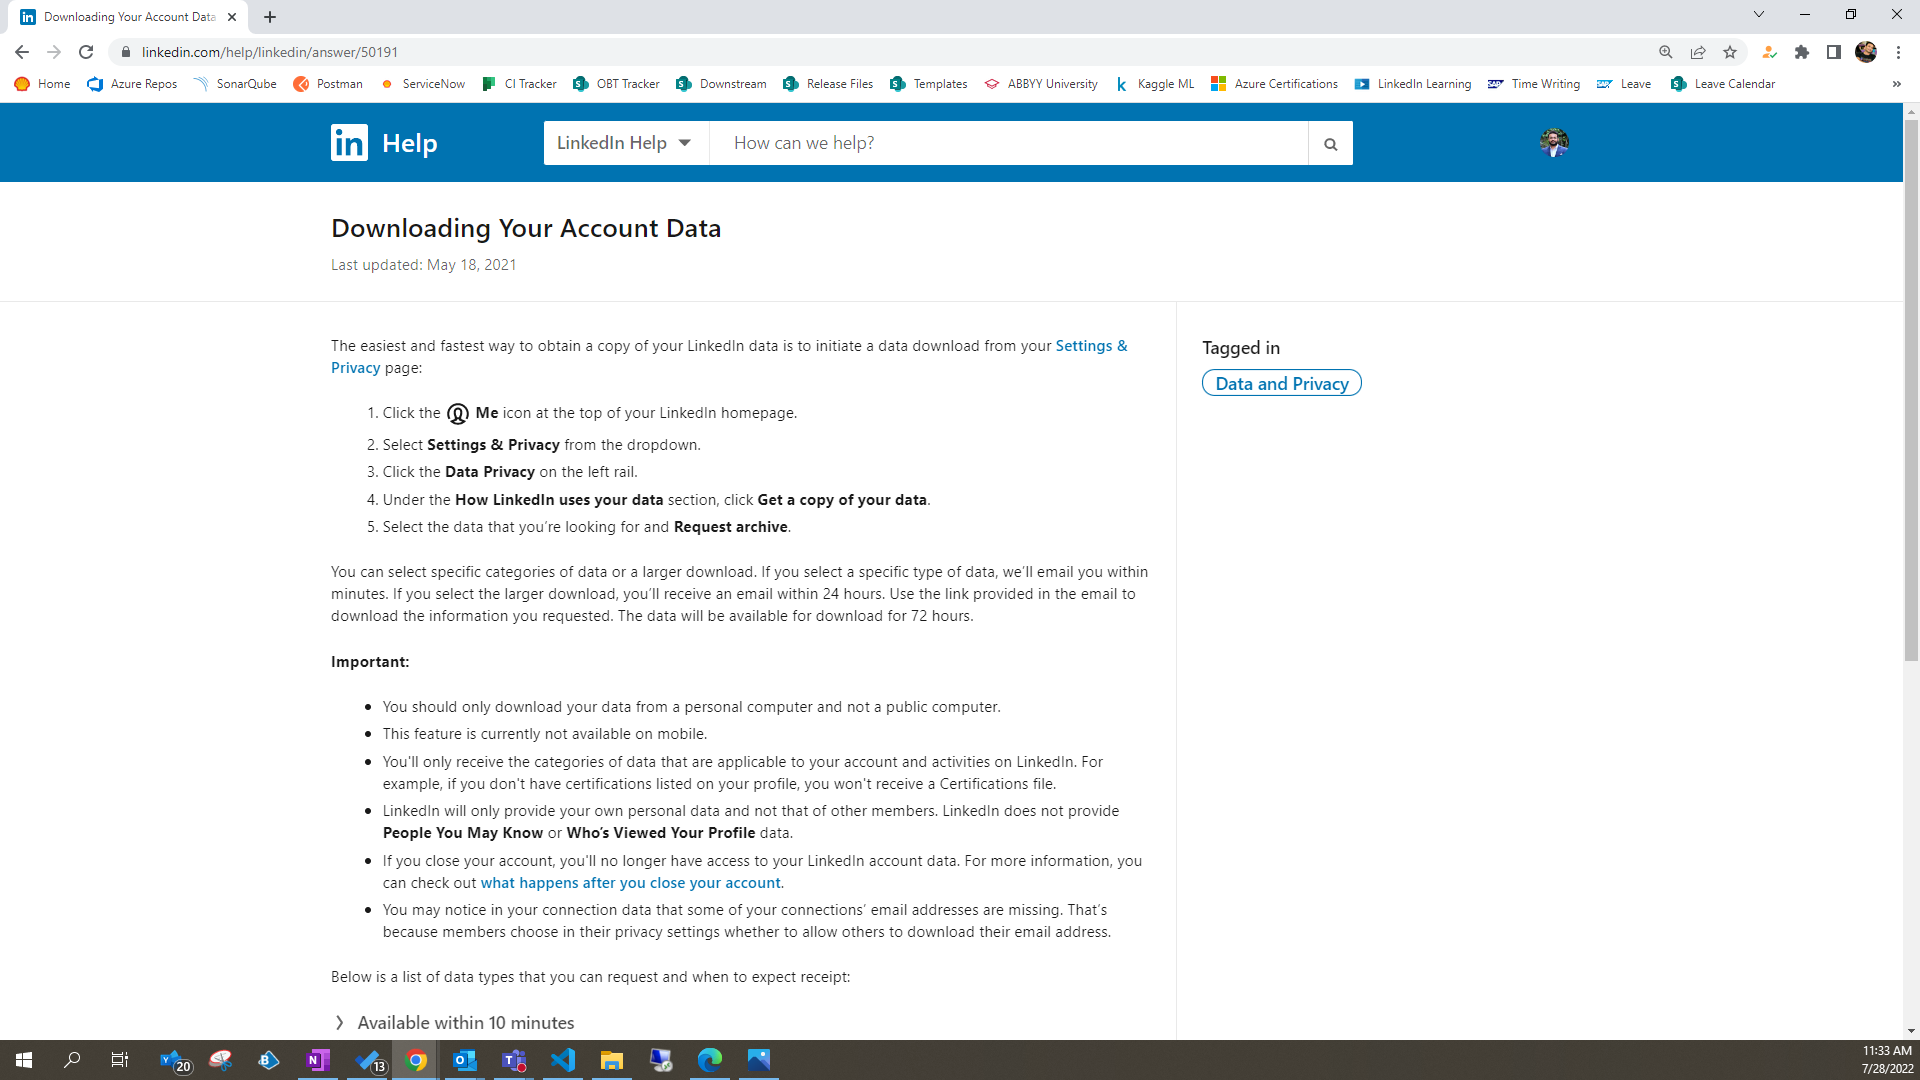

<br>

###**Select the data that you want to analyze**.

1. Navigate to : https://www.linkedin.com/mypreferences/d/download-my-data

2. Select **Want something in particular?**

3. Select optopn **Connection**

4. Click **Request archive**

In this tutorial, we will be analyzing our connections data. Feel free to also analyze anythng else that you are curious about.

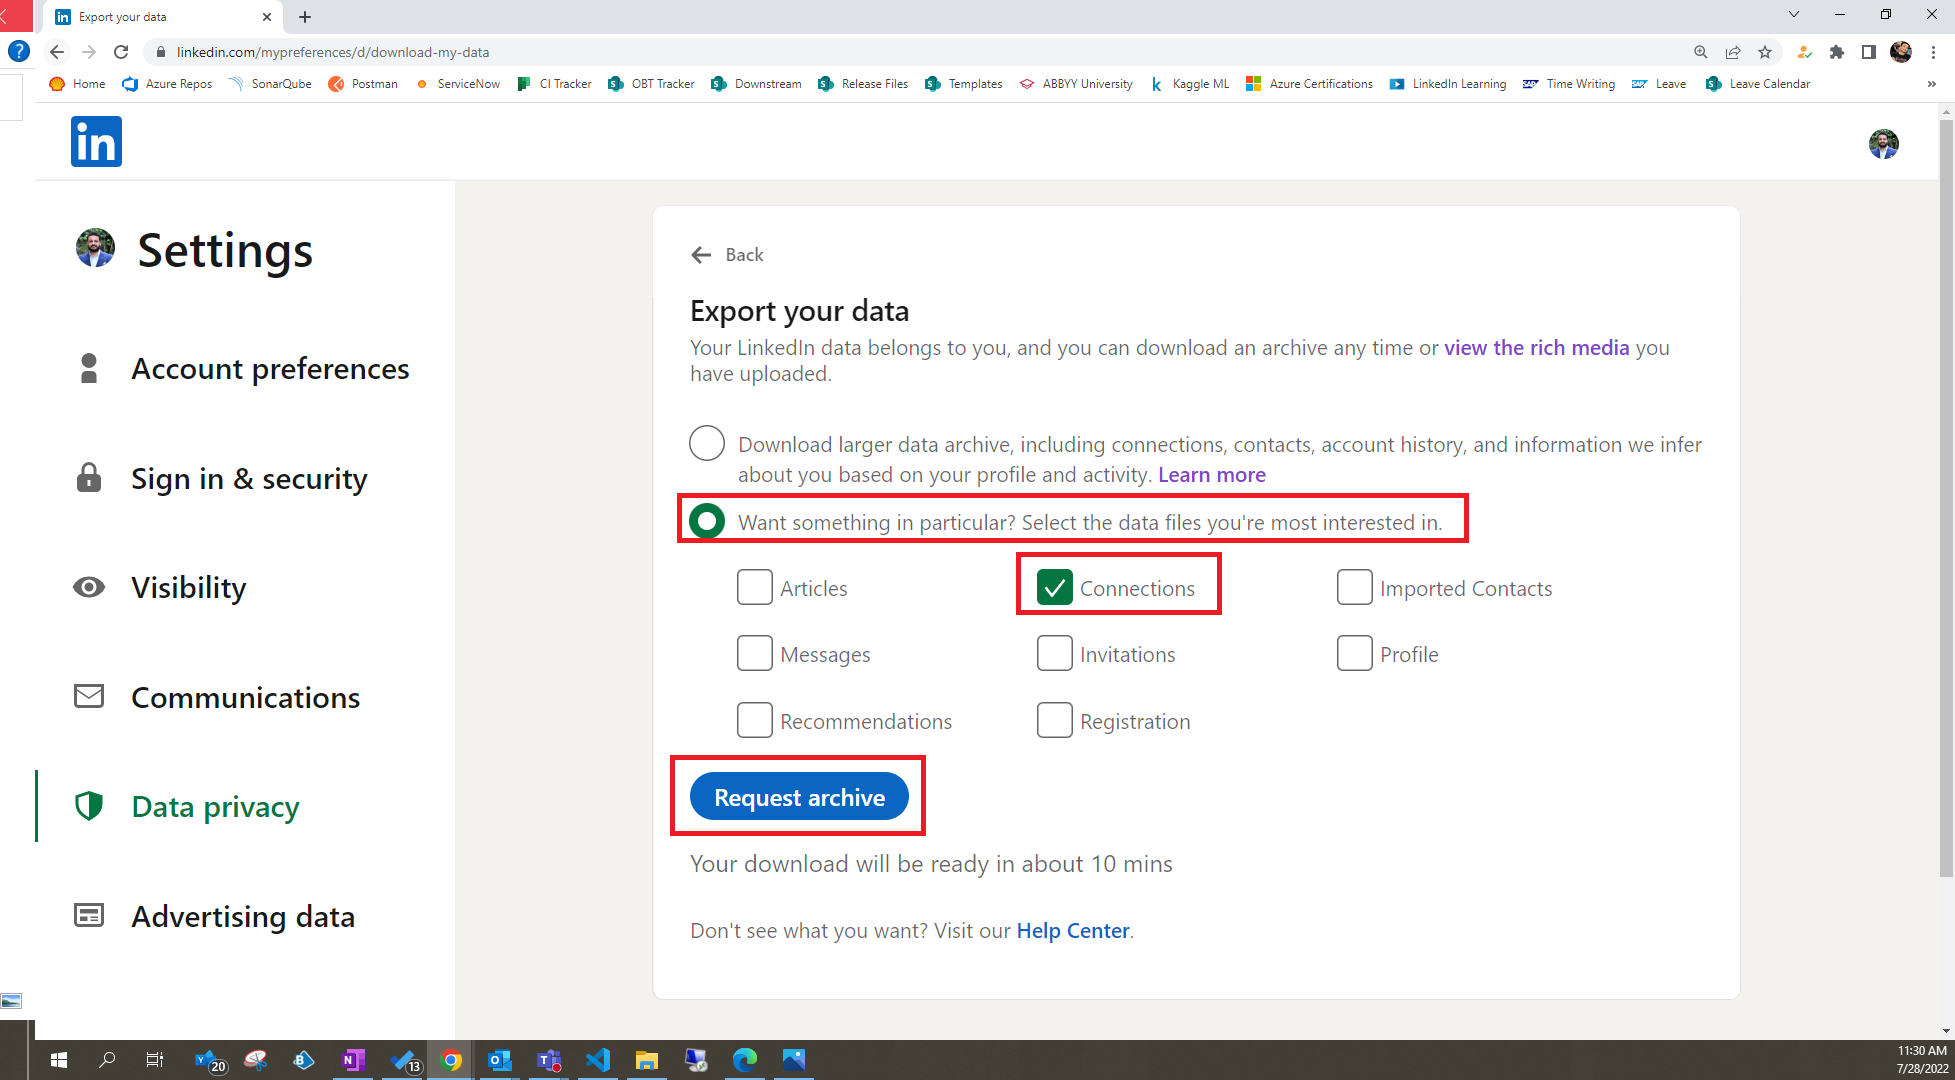

It might take upto 10 minutes before your basic data will be ready for download. <br>
By that time chill & have your coffee ☕

###**You can easily download your data as soon as it ready.**

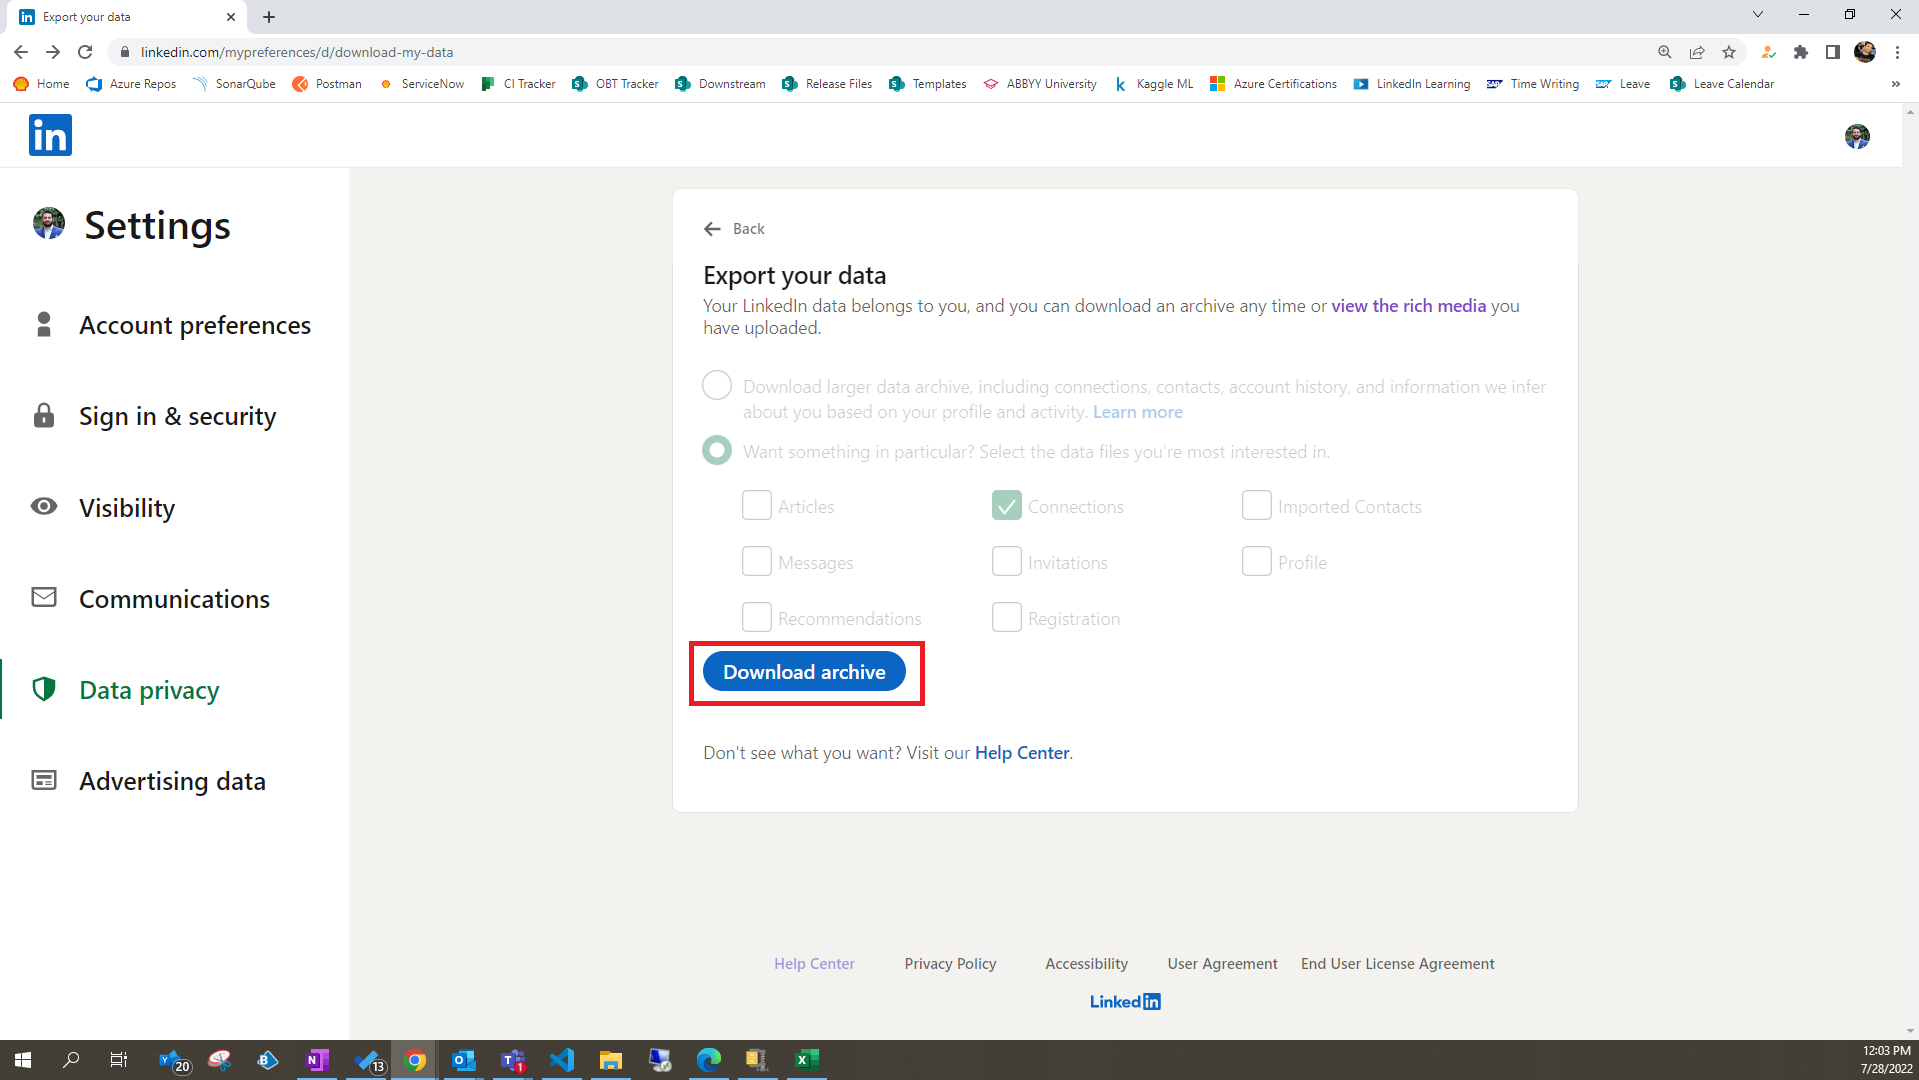

###**Remove additional Rows from Data**
Once you download **Connection.csv**, Remove *first 3* rows from the top (Notes section) to use data as table for pandas

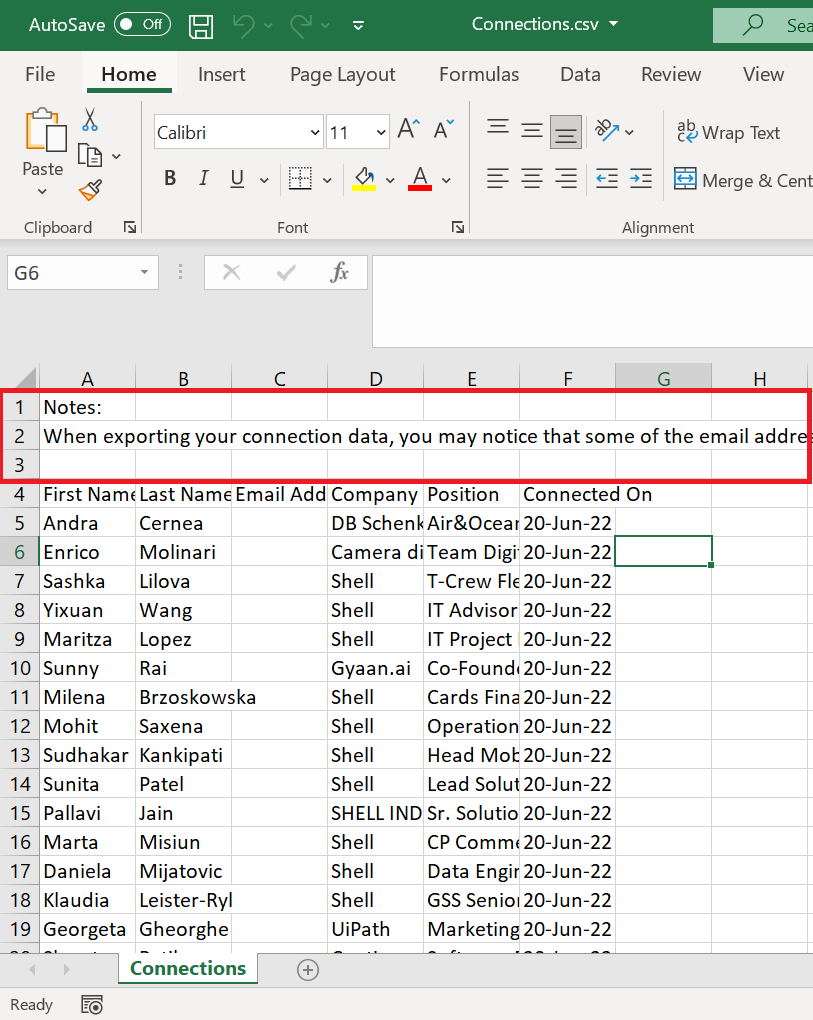

<br>
________________________________________________________________________________________________________________________________________________________________

#**B) Import Data, Libraries and Load Dataset**

Once data is ready in local, to make it work in Colab - upload data in any of the library & copy its path to assign it to pandas

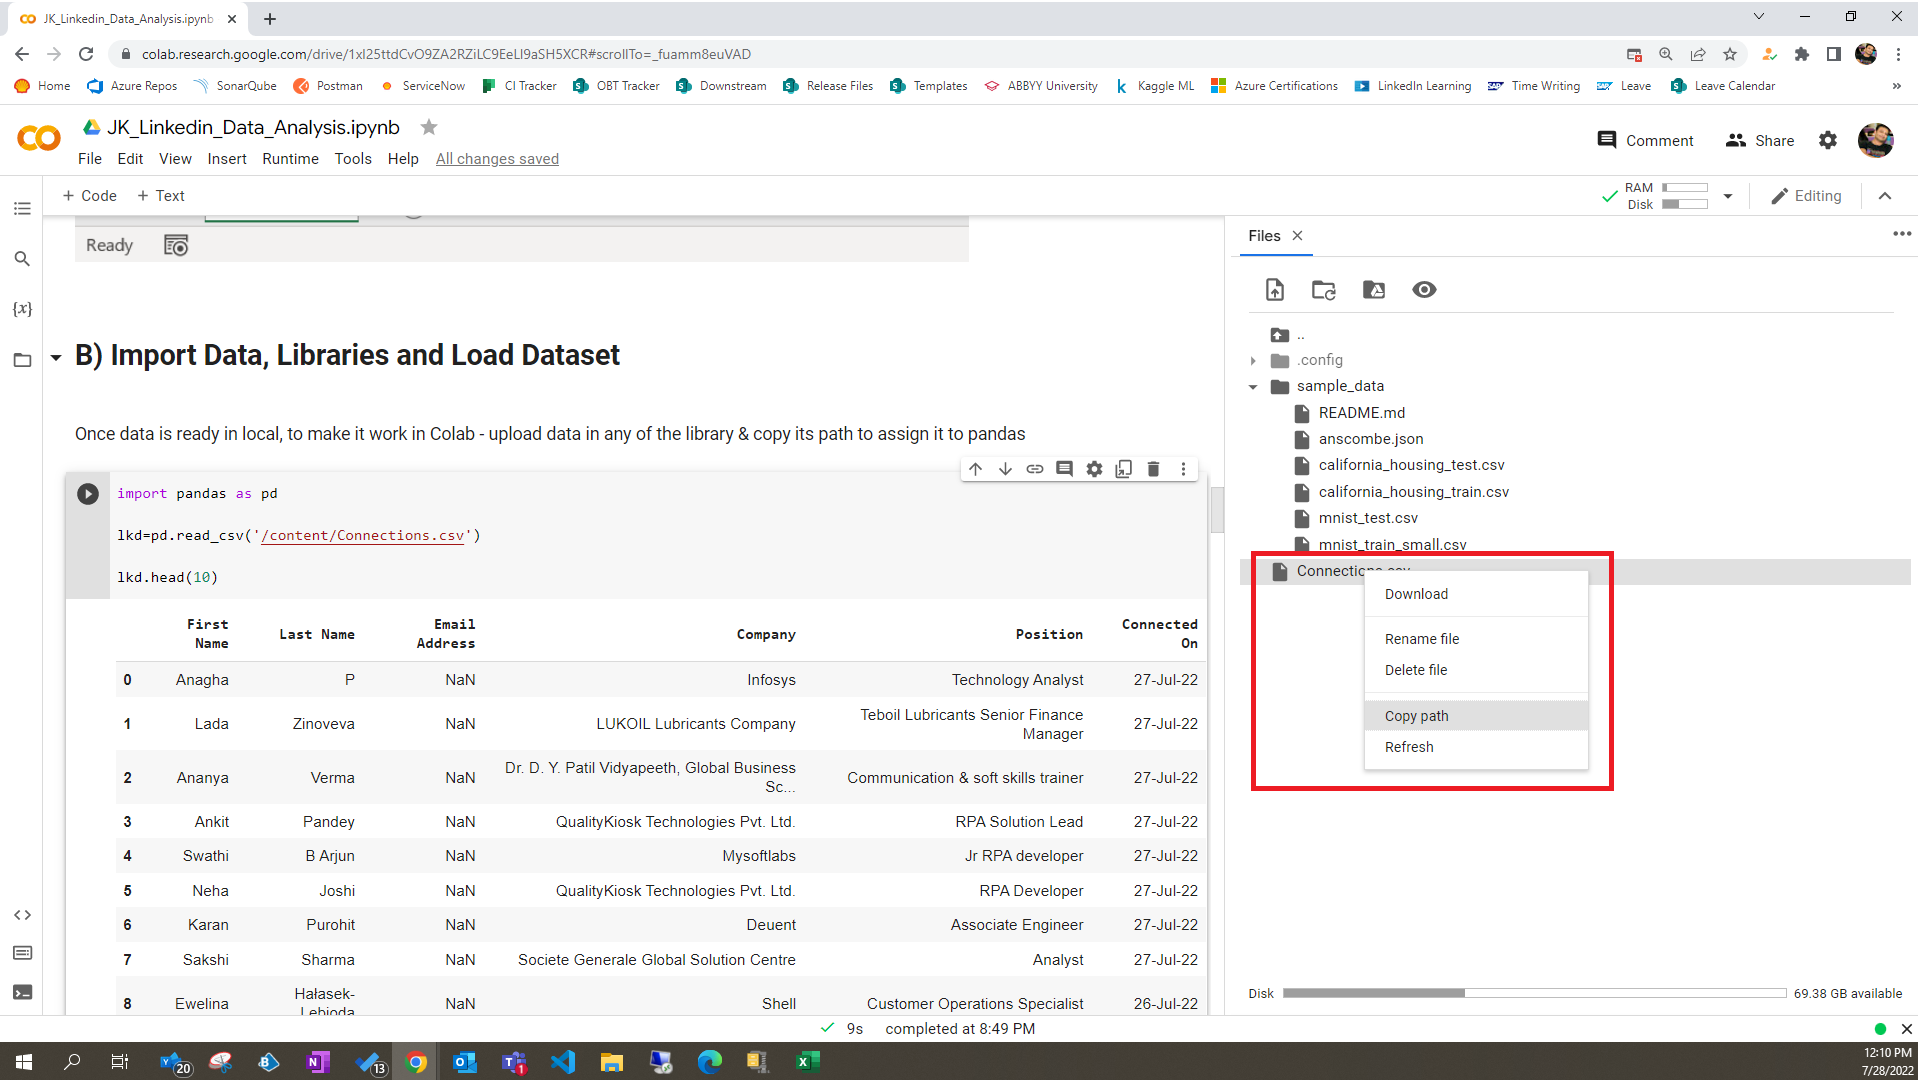

##**Now Let's Start Coding...**

In [1]:
import pandas as pd

lkd=pd.read_csv('/content/Connections.csv')

lkd.head(10)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Anagha,P,NaN,Infosys,Technology Analyst,27-Jul-22
1,Lada,Zinoveva,NaN,LUKOIL Lubricants Company,Teboil Lubricants Senior Finance Manager,27-Jul-22
2,Ananya,Verma,NaN,"Dr. D. Y. Patil Vidyapeeth, Global Business Sc...",Communication & soft skills trainer,27-Jul-22
3,Ankit,Pandey,NaN,QualityKiosk Technologies Pvt. Ltd.,RPA Solution Lead,27-Jul-22
4,Swathi,B Arjun,NaN,Mysoftlabs,Jr RPA developer,27-Jul-22
5,Neha,Joshi,NaN,QualityKiosk Technologies Pvt. Ltd.,RPA Developer,27-Jul-22
6,Karan,Purohit,NaN,Deuent,Associate Engineer,27-Jul-22
7,Sakshi,Sharma,NaN,Societe Generale Global Solution Centre,Analyst,27-Jul-22
8,Ewelina,Hałasek-Lebioda,NaN,Shell,Customer Operations Specialist,26-Jul-22
9,Bipin,Mishra,NaN,ADA,Director of Growth - Marketing Technology,26-Jul-22


In [2]:
lkd.shape

(19210, 6)

<br>

________________________________________________________________________________________________________________________________________________________________

#**C) Linkedin Connections Analysis** 


##**1. Timeline**: How is my Connection activity since last year

In [3]:
import plotly.express as px

#A) Extract connections trend in last 1 Year

Connection_Line = px.line(lkd.groupby(by='Connected On').count()[:365].reset_index(), 
        x="Connected On", 
        y="First Name", 
        labels={'First Name': 'Number'},
        title='Connection Timeline in last 3 months')
Connection_Line

<br>

##**2. Companies**: Where do my Connections work?

<br>
Let's use the **groupby()** function to group our data by the **Company** and use the **count()** function to count how many of our **Connections** work in the various companies.

Now we will sort these values in descending order using the **sort_values()** function by setting **ascending=False**. We will sort it by the count of the **'Connected On'** column.

You can also sort it by any other variable like **First Name, Last Name** or **Position**.

In [44]:
group_company=lkd.groupby(by='Company').count().reset_index()
group_company=group_company.sort_values(by = 'Connected On',ascending=False).reset_index(drop=True)
group_company

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Shell,570,570,8,570,570
1,UiPath,562,562,5,562,562
2,EY,454,454,8,454,454
3,Accenture,376,376,6,376,376
4,Tata Consultancy Services,302,302,3,302,302
...,...,...,...,...,...,...
7573,Grupo Fleury,1,1,0,1,1
7574,Grupo EBD,1,1,0,1,1
7575,Grupo Carrefour Brasil,1,1,0,1,1
7576,Grupo CINTE,1,1,0,1,1


In [101]:
#B) Extract the top 50 companies where network works

Company_Bar = px.bar(group_company[:100],
       x='Company',
       y='Connected On',
       labels={'Connected On': 'Number of Connection'},
       width = 1200,
       height = 900,
       title= 'My LinkedIn Network top 50 Companies'
      )
Company_Bar

### Let's use **Tree Plot** in Plotly to have a better visualisation.

In [80]:
Company_Tree=px.treemap(group_company[:200],
       path = ['Company','Position'],
       values = 'Connected On',
       labels = {'Connected On':'Number of Connections'},
       width = 1000,
       height = 900,
       title = 'Tree Map for companies that my Connections are working at'
       )
Company_Tree

<br>

##**3. Positions**: Which Positions do my connections hold?

In [84]:
lkd['Position'].value_counts()

RPA Developer                        835
Senior Software Engineer             404
Software Engineer                    363
Senior Consultant                    334
Consultant                           222
                                    ... 
Assistant Consultant                  20
Module Lead                           20
Sr RPA Developer                      20
Intelligent Automation Consultant     20
Developer                             20
Name: Position, Length: 87, dtype: int64

In [91]:
#D) Extract the top 30 positions of connections

Position_Bar= px.bar(lkd.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:30].reset_index(),
       x='Position',
       y='Connected On',
       labels={'Connected On': 'Number Of Connections'},
       title= 'The various Positions occupied by my top 5% LinkedIn Connections'
      )
Position_Bar

<br>

**Positions**: Total Number of CEOs in Connection?

In [89]:
Total = lkd.Position.str.startswith('CEO').sum()
Total

95

<br>

###**Postion WordCloud** Visualisation

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib

def CreateWordCloud(text):
  wordcloud=WordCloud(width=1000, height=900,
                      background_color='black',
                      min_font_size = 10,
                      colormap = 'Set2').generate(text)

  fig=plt.figure(figsize=(15,10))
  plt.imshow(wordcloud,interpolation='bilinear')

  plt.show()
  return fig

Using matplotlib backend: agg


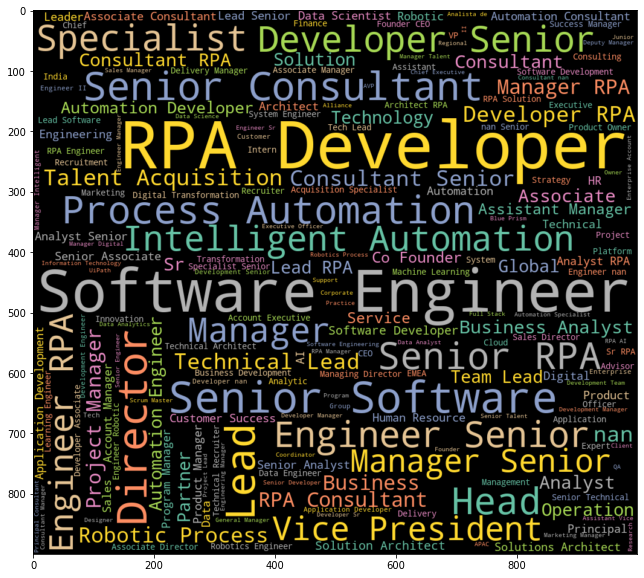

In [103]:
#Convert Position table to string
pos = lkd['Position'].tolist()
s = ","
positions = s.join(map(str, pos))

#Call WordCloud function
CreateWordCloud(positions)

<br>
________________________________________________________________________________________________________________________________________________________________

#**Conclusion**:

Now in this tutorial, we have used the **Connections** data and analyse it and drawn some insights from it.

You can download any different type of your Linkedin data and perform similar analysis.

#**Happy Learning !!!**

~ Jignesh JK.